In [1]:
df = pd.read_pickle('../data/main_df.pkl')
players = pd.read_csv('../data/game_details.csv')

NameError: name 'pd' is not defined

In [2]:
from IPython.display import display
from plotly.subplots import make_subplots
import pandas as pd
import matplotlib as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import pickle



In [3]:
df = pd.read_pickle('../data/main_df.pkl')
players = pd.read_csv('../data/game_details.csv')

FileNotFoundError: [Errno 2] File b'../data/game_details.csv' does not exist: b'../data/game_details.csv'

In [4]:
df = pd.read_pickle('../data/main_df.pkl')
players_df = pd.read_pickle('../data/details_df.pkl')

In [5]:
from IPython.display import display
from plotly.subplots import make_subplots
import pandas as pd
import matplotlib as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import pickle



In [6]:
df = pd.read_pickle('../data/main_df.pkl')
players_df = pd.read_pickle('../data/details_df.pkl')

~~best overall team by wins~~
   - ~~home~~
   - ~~away~~

 ~~most losses~~
 - ~~home~~
 - ~~away~~

 wins by year plots by year all teams
~~best overall by conference?~~
defense wins games - pressure busts pipes -  analyze impact
pressure makes diamonds - look into highest scoring individuals
   - overall
   - by conference
 time series of scoring?
 look into relationship between home team win pct at arenas vs centers vs other for funsies

 look into raptor rating


In [7]:
# plt.figure(figsize=(20,15))
# df.hist(figsize=(20,15));

In [8]:
df['away_team_wins'] = df['home_team_wins'].apply(lambda x: 1.0 if x == 0 else 0)
df['home_team_losses'] = df['away_team_wins'].apply(lambda x: 1.0 if x == 1 else 0)
df['away_team_losses'] = df['home_team_wins'].apply(lambda x: 1.0 if x == 1 else 0)

In [9]:
home_history_totals = df.groupby(by='home_team_id').sum()[['home_team_wins','home_team_losses','sum_of_fgm_home',
       'sum_of_fga_home', 'sum_of_fg3m_home', 'sum_of_fg3a_home',
       'sum_of_ftm_home', 'sum_of_fta_home', 'sum_of_oreb_home',
       'sum_of_dreb_home', 'sum_of_stl_home', 'sum_of_blk_home',
       'sum_of_to_home', 'sum_of_pf_home']]

away_history_totals = df.copy().groupby(by='visitor_team_id').sum()[['away_team_wins','away_team_losses','sum_of_fgm_away',
       'sum_of_fga_away', 'sum_of_fg3m_away', 'sum_of_fg3a_away',
       'sum_of_ftm_away', 'sum_of_fta_away', 'sum_of_oreb_away',
       'sum_of_dreb_away', 'sum_of_stl_away', 'sum_of_blk_away',
       'sum_of_to_away', 'sum_of_pf_away']]

home_history_totals.reset_index(inplace=True)
away_history_totals.reset_index(inplace=True)



In [10]:
home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])


away_history_totals = away_history_totals.merge(df[['visitor_team_id','away_nickname', 'away_yearfounded','away_arena', 'away_city', 'away_conference']],on=['visitor_team_id'])



In [11]:
home_history_totals.drop_duplicates(inplace=True)
away_history_totals.drop_duplicates(inplace=True)
home_history_totals.reset_index(drop=True, inplace=True)
away_history_totals.reset_index(drop=True, inplace=True)

In [12]:
display(home_history_totals.head())
display(away_history_totals.head())


,home_team_id,home_team_wins,home_team_losses,sum_of_fgm_home,sum_of_fga_home,sum_of_fg3m_home,sum_of_fg3a_home,sum_of_ftm_home,sum_of_fta_home,sum_of_oreb_home,sum_of_dreb_home,sum_of_stl_home,sum_of_blk_home,sum_of_to_home,sum_of_pf_home,home_nickname,home_yearfounded,home_arena,home_city,home_conference
0,1610612737,416,324.0,19385.0,41763.0,3796.0,10504.0,9162.0,12011.0,5167.0,15750.0,3783.0,2565.0,7014.0,9000.0,Hawks,1949,State Farm Arena,Atlanta,East
1,1610612738,502,278.0,20328.0,42984.0,4034.0,10975.0,9857.0,12542.0,4680.0,16474.0,4010.0,2426.0,7179.0,9395.0,Celtics,1946,TD Garden,Boston,East
2,1610612739,479,295.0,20529.0,43932.0,4010.0,10713.0,10247.0,13576.0,5884.0,16511.0,3652.0,2497.0,6962.0,8716.0,Cavaliers,1970,Quicken Loans Arena,Cleveland,East
3,1610612740,388,324.0,18656.0,39840.0,3126.0,8789.0,8858.0,11446.0,5330.0,15389.0,3683.0,2523.0,6195.0,8307.0,Pelicans,2002,Smoothie King Center,New Orleans,West
4,1610612741,429,319.0,18552.0,41627.0,3114.0,8762.0,8995.0,11655.0,5792.0,16242.0,3543.0,2674.0,6651.0,8810.0,Bulls,1966,United Center,Chicago,East


,visitor_team_id,away_team_wins,away_team_losses,sum_of_fgm_away,sum_of_fga_away,sum_of_fg3m_away,sum_of_fg3a_away,sum_of_ftm_away,sum_of_fta_away,sum_of_oreb_away,sum_of_dreb_away,sum_of_stl_away,sum_of_blk_away,sum_of_to_away,sum_of_pf_away,away_nickname,away_yearfounded,away_arena,away_city,away_conference
0,1610612737,263.0,483.0,18425.0,40831.0,3667.0,10305.0,8468.0,11272.0,4928.0,15195.0,3826.0,2544.0,7370.0,9276.0,Hawks,1949,State Farm Arena,Atlanta,East
1,1610612738,370.0,402.0,19721.0,42703.0,4007.0,10910.0,9760.0,12370.0,4581.0,16020.0,3925.0,2150.0,7274.0,10038.0,Celtics,1946,TD Garden,Boston,East
2,1610612739,321.0,444.0,19877.0,44005.0,3810.0,10832.0,10059.0,13428.0,5615.0,16000.0,3563.0,2000.0,7291.0,9451.0,Cavaliers,1970,Quicken Loans Arena,Cleveland,East
3,1610612740,267.0,454.0,18426.0,40332.0,3246.0,8933.0,8526.0,11020.0,5151.0,15033.0,3475.0,2170.0,6538.0,8874.0,Pelicans,2002,Smoothie King Center,New Orleans,West
4,1610612741,310.0,428.0,18171.0,40432.0,3128.0,8765.0,8716.0,11251.0,5302.0,15476.0,3382.0,2195.0,6976.0,9042.0,Bulls,1966,United Center,Chicago,East


In [13]:
home_history_totals.sort_values(by='home_team_wins', ascending=False, inplace=True)
away_history_totals.sort_values(by='away_team_wins', ascending=False, inplace=True)

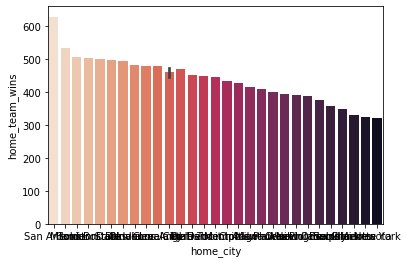

In [14]:
# plt.figure(figsize=(20,15))
display(sns.barplot(x='home_city', y='home_team_wins', data=home_history_totals, palette='rocket_r'))



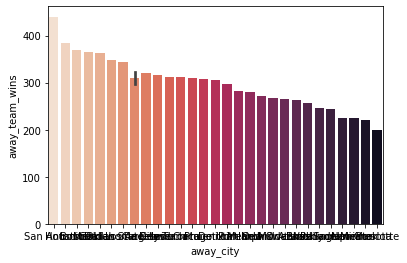

In [15]:
display(sns.barplot(x='away_city', y='away_team_wins', data=away_history_totals, palette='rocket_r'))


In [16]:
display(home_history_totals.columns)
display(away_history_totals.columns)

Index(['home_team_id', 'home_team_wins', 'home_team_losses', 'sum_of_fgm_home',
       'sum_of_fga_home', 'sum_of_fg3m_home', 'sum_of_fg3a_home',
       'sum_of_ftm_home', 'sum_of_fta_home', 'sum_of_oreb_home',
       'sum_of_dreb_home', 'sum_of_stl_home', 'sum_of_blk_home',
       'sum_of_to_home', 'sum_of_pf_home', 'home_nickname', 'home_yearfounded',
       'home_arena', 'home_city', 'home_conference'],
      dtype='object')

Index(['visitor_team_id', 'away_team_wins', 'away_team_losses',
       'sum_of_fgm_away', 'sum_of_fga_away', 'sum_of_fg3m_away',
       'sum_of_fg3a_away', 'sum_of_ftm_away', 'sum_of_fta_away',
       'sum_of_oreb_away', 'sum_of_dreb_away', 'sum_of_stl_away',
       'sum_of_blk_away', 'sum_of_to_away', 'sum_of_pf_away', 'away_nickname',
       'away_yearfounded', 'away_arena', 'away_city', 'away_conference'],
      dtype='object')

In [17]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=home_history_totals.home_city, y=home_history_totals.home_team_wins),
    go.Bar(name='Away Wins', x=away_history_totals.away_city, y=away_history_totals.away_team_wins),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

## consider doing both grouped and stacked charts

In [18]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=home_history_totals.home_nickname, y=home_history_totals.home_team_wins, marker_color='burlywood'),
    go.Bar(name='Away Wins', x=away_history_totals.away_nickname, y=away_history_totals.away_team_wins, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Wins Per Team by Travel',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [19]:
home_history_totals.sort_values(by='home_team_losses', ascending=False, inplace=True)
away_history_totals.sort_values(by='away_team_losses', ascending=False, inplace=True)
fig = go.Figure(data=[
    go.Bar(name='Home Losses', x=home_history_totals.home_nickname, y=home_history_totals.home_team_losses, marker_color='burlywood'),
    go.Bar(name='Away Losses', x=away_history_totals.away_nickname, y=away_history_totals.away_team_losses, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Losses Per Team by Travel',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [20]:
season_df = df.copy().groupby(by=['season','home_team_id']).sum()[['home_team_wins','home_team_losses','away_team_wins','away_team_losses']]
season_df.reset_index(inplace=True)
season_df['total_wins'] = season_df.home_team_wins + season_df.away


AttributeError: 'DataFrame' object has no attribute 'away'

In [21]:
details_df.head()

NameError: name 'details_df' is not defined

In [22]:
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,oreb,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [23]:
players_df.isna().sum()

game_id              0
team_id              0
team_abbreviation    0
team_city            0
player_id            0
player_name          0
start_position       0
min                  0
fgm                  0
fga                  0
fg_pct               0
fg3m                 0
fg3a                 0
fg3_pct              0
ftm                  0
fta                  0
ft_pct               0
oreb                 0
dreb                 0
reb                  0
ast                  0
stl                  0
blk                  0
to                   0
pf                   0
pts                  0
plus_minus           0
dtype: int64

In [24]:
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,oreb,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [25]:
players_df['total_boards'] = players_df.oreb + players_df.dreb

In [26]:
players_df['total_boards'] = players_df.oreb + players_df.dreb

In [27]:
players_df.columns

Index(['game_id', 'team_id', 'team_abbreviation', 'team_city', 'player_id',
       'player_name', 'start_position', 'min', 'fgm', 'fga', 'fg_pct', 'fg3m',
       'fg3a', 'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb', 'reb', 'ast',
       'stl', 'blk', 'to', 'pf', 'pts', 'plus_minus', 'total_boards'],
      dtype='object')

In [28]:
players_df.groupby(by='player_id').sum()

,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,...,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards
player_id,,,,,,,,,,,,,,,,,,,,,
15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,17.0,...,14.0,17.0,15.0,7.0,1.0,8.0,18.0,76.0,-4.0,17.0
43,101501140,8053063820,11.0,28.0,1.883,6.0,13.0,2.750,5.0,5.0,...,6.0,7.0,6.0,3.0,2.0,5.0,5.0,33.0,-19.0,7.0
56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,567.0,...,671.0,840.0,1283.0,260.0,40.0,423.0,478.0,2754.0,239.0,840.0
57,3189370034,233538849733,500.0,1157.0,60.850,76.0,234.0,29.808,262.0,305.0,...,455.0,579.0,595.0,251.0,65.0,281.0,324.0,1338.0,428.0,579.0
72,1037312643,82141250114,138.0,336.0,19.743,3.0,9.0,2.333,42.0,59.0,...,93.0,123.0,154.0,37.0,5.0,69.0,102.0,321.0,-75.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629680,230904999,17716740305,18.0,58.0,3.179,10.0,43.0,2.115,6.0,10.0,...,18.0,28.0,15.0,27.0,13.0,14.0,23.0,52.0,12.0,28.0
1629684,99502439,8053063690,9.0,17.0,1.700,6.0,8.0,2.417,2.0,2.0,...,9.0,11.0,12.0,2.0,4.0,6.0,16.0,26.0,25.0,11.0
1629719,11900079,1610612747,6.0,9.0,0.667,0.0,0.0,0.000,4.0,6.0,...,8.0,10.0,4.0,0.0,1.0,1.0,4.0,16.0,6.0,10.0


In [29]:
players_df.groupby(by='player_id').sum()

,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,...,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards
player_id,,,,,,,,,,,,,,,,,,,,,
15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,17.0,...,14.0,17.0,15.0,7.0,1.0,8.0,18.0,76.0,-4.0,17.0
43,101501140,8053063820,11.0,28.0,1.883,6.0,13.0,2.750,5.0,5.0,...,6.0,7.0,6.0,3.0,2.0,5.0,5.0,33.0,-19.0,7.0
56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,567.0,...,671.0,840.0,1283.0,260.0,40.0,423.0,478.0,2754.0,239.0,840.0
57,3189370034,233538849733,500.0,1157.0,60.850,76.0,234.0,29.808,262.0,305.0,...,455.0,579.0,595.0,251.0,65.0,281.0,324.0,1338.0,428.0,579.0
72,1037312643,82141250114,138.0,336.0,19.743,3.0,9.0,2.333,42.0,59.0,...,93.0,123.0,154.0,37.0,5.0,69.0,102.0,321.0,-75.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629680,230904999,17716740305,18.0,58.0,3.179,10.0,43.0,2.115,6.0,10.0,...,18.0,28.0,15.0,27.0,13.0,14.0,23.0,52.0,12.0,28.0
1629684,99502439,8053063690,9.0,17.0,1.700,6.0,8.0,2.417,2.0,2.0,...,9.0,11.0,12.0,2.0,4.0,6.0,16.0,26.0,25.0,11.0
1629719,11900079,1610612747,6.0,9.0,0.667,0.0,0.0,0.000,4.0,6.0,...,8.0,10.0,4.0,0.0,1.0,1.0,4.0,16.0,6.0,10.0


In [30]:
players_df

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0,8.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0,20.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0,7.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0,7.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574113,21200001,1610612739,CLE,Cleveland,202087,Alonzo Gee,F,33:53,2.0,9.0,...,1.0,3.0,2.0,2.0,0.0,3.0,5.0,4.0,14.0,3.0
574114,21200001,1610612739,CLE,Cleveland,202684,Tristan Thompson,F,31:31,5.0,8.0,...,7.0,10.0,5.0,1.0,0.0,2.0,2.0,12.0,20.0,10.0
574115,21200001,1610612739,CLE,Cleveland,2760,Anderson Varejao,C,37:22,3.0,7.0,...,11.0,23.0,9.0,0.0,2.0,1.0,4.0,9.0,7.0,23.0
574116,21200001,1610612739,CLE,Cleveland,203079,Dion Waiters,G,28:14,6.0,14.0,...,2.0,2.0,0.0,3.0,0.0,3.0,0.0,17.0,13.0,2.0


In [31]:
player_totals = players_df.groupby(by='player_id').sum()

In [32]:
player_totals = players_df.groupby(by='player_id').sum()
player_totals.reset_index(inplace=True)

In [33]:
player_totals = players_df.groupby(by='player_id').sum()
player_totals.reset_index(inplace=True)
player_totals.head()

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards
0,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,14.0,17.0,15.0,7.0,1.0,8.0,18.0,76.0,-4.0,17.0
1,43,101501140,8053063820,11.0,28.0,1.883,6.0,13.0,2.750,5.0,...,6.0,7.0,6.0,3.0,2.0,5.0,5.0,33.0,-19.0,7.0
2,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,671.0,840.0,1283.0,260.0,40.0,423.0,478.0,2754.0,239.0,840.0
3,57,3189370034,233538849733,500.0,1157.0,60.850,76.0,234.0,29.808,262.0,...,455.0,579.0,595.0,251.0,65.0,281.0,324.0,1338.0,428.0,579.0
4,72,1037312643,82141250114,138.0,336.0,19.743,3.0,9.0,2.333,42.0,...,93.0,123.0,154.0,37.0,5.0,69.0,102.0,321.0,-75.0,123.0


In [34]:
player_totals = pd.merge(player_totals,df[['player_id','player_name','start_position','team_city']], on=['player_id'])

# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

KeyError: "None of [Index(['player_id', 'player_name', 'start_position', 'team_city'], dtype='object')] are in the [columns]"

In [35]:
player_totals = pd.merge(player_totals,players_df[['player_id','player_name','start_position','team_city']], on=['player_id'])

# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

In [36]:
player_totals

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,stl,blk,to,pf,pts,plus_minus,total_boards,player_name,start_position,team_city
0,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski,G,Chicago
1,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski,G,Chicago
2,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski,G,Chicago
3,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski,G,Chicago
4,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski,G,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221369,1629740,131402252,9663676440,16.0,34.0,2.411,7.0,17.0,2.350,10.0,...,3.0,3.0,4.0,12.0,49.0,-6.0,19.0,Nicolo Melli,F,New Orleans
221370,1629740,131402252,9663676440,16.0,34.0,2.411,7.0,17.0,2.350,10.0,...,3.0,3.0,4.0,12.0,49.0,-6.0,19.0,Nicolo Melli,F,New Orleans
221371,1629740,131402252,9663676440,16.0,34.0,2.411,7.0,17.0,2.350,10.0,...,3.0,3.0,4.0,12.0,49.0,-6.0,19.0,Nicolo Melli,F,New Orleans
221372,1629740,131402252,9663676440,16.0,34.0,2.411,7.0,17.0,2.350,10.0,...,3.0,3.0,4.0,12.0,49.0,-6.0,19.0,Nicolo Melli,F,New Orleans


In [37]:
player_totals = pd.merge(player_totals,players_df[['player_id','player_name','start_position','team_city']], on=['player_id'])
player_totals.drop_duplicates(inplace=True)
# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

KeyboardInterrupt: 

In [38]:
player_totals = pd.merge(left,player_totals,players_df[['player_id','player_name','start_position','team_city']], on=['player_id'])
# player_totals.drop_duplicates(inplace=True)
# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

NameError: name 'left' is not defined

In [39]:
player_totals = pd.merge(how='left',player_totals,players_df[['player_id','player_name','start_position','team_city']], on=['player_id'])

# player_totals.drop_duplicates(inplace=True)
# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

SyntaxError: positional argument follows keyword argument (<ipython-input-39-57033f82ad2d>, line 1)

In [40]:
player_totals = pd.merge(player_totals,players_df[['player_id','player_name','start_position','team_city']], how='left', on=['player_id'])

# player_totals.drop_duplicates(inplace=True)
# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

MemoryError: 

In [1]:
from IPython.display import display
from plotly.subplots import make_subplots
import pandas as pd
import matplotlib as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import pickle



In [2]:
df = pd.read_pickle('../data/main_df.pkl')
players_df = pd.read_pickle('../data/details_df.pkl')

~~best overall team by wins~~
   - ~~home~~
   - ~~away~~

 ~~most losses~~
 - ~~home~~
 - ~~away~~

 wins by year plots by year all teams
~~best overall by conference?~~
defense wins games - pressure busts pipes -  analyze impact
pressure makes diamonds - look into highest scoring individuals
   - overall
   - by conference
 time series of scoring?
 look into relationship between home team win pct at arenas vs centers vs other for funsies

 look into raptor rating


In [3]:
# plt.figure(figsize=(20,15))
# df.hist(figsize=(20,15));

In [4]:
df['away_team_wins'] = df['home_team_wins'].apply(lambda x: 1.0 if x == 0 else 0)
df['home_team_losses'] = df['away_team_wins'].apply(lambda x: 1.0 if x == 1 else 0)
df['away_team_losses'] = df['home_team_wins'].apply(lambda x: 1.0 if x == 1 else 0)

In [5]:
home_history_totals = df.groupby(by='home_team_id').sum()[['home_team_wins','home_team_losses','sum_of_fgm_home',
       'sum_of_fga_home', 'sum_of_fg3m_home', 'sum_of_fg3a_home',
       'sum_of_ftm_home', 'sum_of_fta_home', 'sum_of_oreb_home',
       'sum_of_dreb_home', 'sum_of_stl_home', 'sum_of_blk_home',
       'sum_of_to_home', 'sum_of_pf_home']]

away_history_totals = df.copy().groupby(by='visitor_team_id').sum()[['away_team_wins','away_team_losses','sum_of_fgm_away',
       'sum_of_fga_away', 'sum_of_fg3m_away', 'sum_of_fg3a_away',
       'sum_of_ftm_away', 'sum_of_fta_away', 'sum_of_oreb_away',
       'sum_of_dreb_away', 'sum_of_stl_away', 'sum_of_blk_away',
       'sum_of_to_away', 'sum_of_pf_away']]

home_history_totals.reset_index(inplace=True)
away_history_totals.reset_index(inplace=True)



In [6]:
home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])


away_history_totals = away_history_totals.merge(df[['visitor_team_id','away_nickname', 'away_yearfounded','away_arena', 'away_city', 'away_conference']],on=['visitor_team_id'])



In [7]:
home_history_totals.drop_duplicates(inplace=True)
away_history_totals.drop_duplicates(inplace=True)
home_history_totals.reset_index(drop=True, inplace=True)
away_history_totals.reset_index(drop=True, inplace=True)

In [8]:
display(home_history_totals.head())
display(away_history_totals.head())


,home_team_id,home_team_wins,home_team_losses,sum_of_fgm_home,sum_of_fga_home,sum_of_fg3m_home,sum_of_fg3a_home,sum_of_ftm_home,sum_of_fta_home,sum_of_oreb_home,sum_of_dreb_home,sum_of_stl_home,sum_of_blk_home,sum_of_to_home,sum_of_pf_home,home_nickname,home_yearfounded,home_arena,home_city,home_conference
0,1610612737,416,324.0,19385.0,41763.0,3796.0,10504.0,9162.0,12011.0,5167.0,15750.0,3783.0,2565.0,7014.0,9000.0,Hawks,1949,State Farm Arena,Atlanta,East
1,1610612738,502,278.0,20328.0,42984.0,4034.0,10975.0,9857.0,12542.0,4680.0,16474.0,4010.0,2426.0,7179.0,9395.0,Celtics,1946,TD Garden,Boston,East
2,1610612739,479,295.0,20529.0,43932.0,4010.0,10713.0,10247.0,13576.0,5884.0,16511.0,3652.0,2497.0,6962.0,8716.0,Cavaliers,1970,Quicken Loans Arena,Cleveland,East
3,1610612740,388,324.0,18656.0,39840.0,3126.0,8789.0,8858.0,11446.0,5330.0,15389.0,3683.0,2523.0,6195.0,8307.0,Pelicans,2002,Smoothie King Center,New Orleans,West
4,1610612741,429,319.0,18552.0,41627.0,3114.0,8762.0,8995.0,11655.0,5792.0,16242.0,3543.0,2674.0,6651.0,8810.0,Bulls,1966,United Center,Chicago,East


,visitor_team_id,away_team_wins,away_team_losses,sum_of_fgm_away,sum_of_fga_away,sum_of_fg3m_away,sum_of_fg3a_away,sum_of_ftm_away,sum_of_fta_away,sum_of_oreb_away,sum_of_dreb_away,sum_of_stl_away,sum_of_blk_away,sum_of_to_away,sum_of_pf_away,away_nickname,away_yearfounded,away_arena,away_city,away_conference
0,1610612737,263.0,483.0,18425.0,40831.0,3667.0,10305.0,8468.0,11272.0,4928.0,15195.0,3826.0,2544.0,7370.0,9276.0,Hawks,1949,State Farm Arena,Atlanta,East
1,1610612738,370.0,402.0,19721.0,42703.0,4007.0,10910.0,9760.0,12370.0,4581.0,16020.0,3925.0,2150.0,7274.0,10038.0,Celtics,1946,TD Garden,Boston,East
2,1610612739,321.0,444.0,19877.0,44005.0,3810.0,10832.0,10059.0,13428.0,5615.0,16000.0,3563.0,2000.0,7291.0,9451.0,Cavaliers,1970,Quicken Loans Arena,Cleveland,East
3,1610612740,267.0,454.0,18426.0,40332.0,3246.0,8933.0,8526.0,11020.0,5151.0,15033.0,3475.0,2170.0,6538.0,8874.0,Pelicans,2002,Smoothie King Center,New Orleans,West
4,1610612741,310.0,428.0,18171.0,40432.0,3128.0,8765.0,8716.0,11251.0,5302.0,15476.0,3382.0,2195.0,6976.0,9042.0,Bulls,1966,United Center,Chicago,East


In [9]:
home_history_totals.sort_values(by='home_team_wins', ascending=False, inplace=True)
away_history_totals.sort_values(by='away_team_wins', ascending=False, inplace=True)

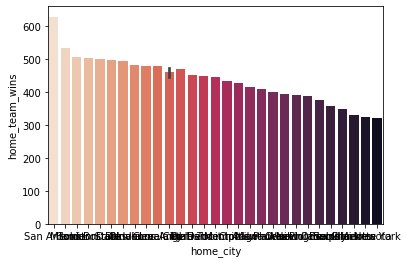

In [10]:
# plt.figure(figsize=(20,15))
display(sns.barplot(x='home_city', y='home_team_wins', data=home_history_totals, palette='rocket_r'))



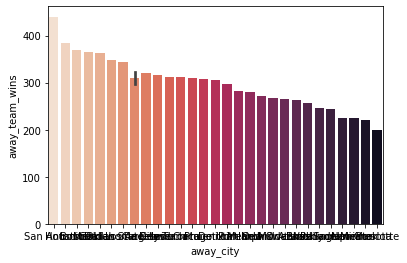

In [11]:
display(sns.barplot(x='away_city', y='away_team_wins', data=away_history_totals, palette='rocket_r'))


In [12]:
display(home_history_totals.columns)
display(away_history_totals.columns)

Index(['home_team_id', 'home_team_wins', 'home_team_losses', 'sum_of_fgm_home',
       'sum_of_fga_home', 'sum_of_fg3m_home', 'sum_of_fg3a_home',
       'sum_of_ftm_home', 'sum_of_fta_home', 'sum_of_oreb_home',
       'sum_of_dreb_home', 'sum_of_stl_home', 'sum_of_blk_home',
       'sum_of_to_home', 'sum_of_pf_home', 'home_nickname', 'home_yearfounded',
       'home_arena', 'home_city', 'home_conference'],
      dtype='object')

Index(['visitor_team_id', 'away_team_wins', 'away_team_losses',
       'sum_of_fgm_away', 'sum_of_fga_away', 'sum_of_fg3m_away',
       'sum_of_fg3a_away', 'sum_of_ftm_away', 'sum_of_fta_away',
       'sum_of_oreb_away', 'sum_of_dreb_away', 'sum_of_stl_away',
       'sum_of_blk_away', 'sum_of_to_away', 'sum_of_pf_away', 'away_nickname',
       'away_yearfounded', 'away_arena', 'away_city', 'away_conference'],
      dtype='object')

In [13]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=home_history_totals.home_city, y=home_history_totals.home_team_wins),
    go.Bar(name='Away Wins', x=away_history_totals.away_city, y=away_history_totals.away_team_wins),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

## consider doing both grouped and stacked charts

In [14]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=home_history_totals.home_nickname, y=home_history_totals.home_team_wins, marker_color='burlywood'),
    go.Bar(name='Away Wins', x=away_history_totals.away_nickname, y=away_history_totals.away_team_wins, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Wins Per Team by Travel',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [15]:
home_history_totals.sort_values(by='home_team_losses', ascending=False, inplace=True)
away_history_totals.sort_values(by='away_team_losses', ascending=False, inplace=True)
fig = go.Figure(data=[
    go.Bar(name='Home Losses', x=home_history_totals.home_nickname, y=home_history_totals.home_team_losses, marker_color='burlywood'),
    go.Bar(name='Away Losses', x=away_history_totals.away_nickname, y=away_history_totals.away_team_losses, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Losses Per Team by Travel',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()


In [16]:
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,oreb,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [17]:
players_df['total_boards'] = players_df.oreb + players_df.dreb

In [18]:
player_totals = players_df.groupby(by='player_id').sum()
player_totals.reset_index(inplace=True)

In [19]:
player_totals = pd.merge(player_totals,players_df[['player_id','player_name','start_position','team_city']], how='left', on=['player_id'])

# player_totals.drop_duplicates(inplace=True)
# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

In [20]:
player_totals

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,stl,blk,to,pf,pts,plus_minus,total_boards,player_name,start_position,team_city
0,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski,G,Chicago
1,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski,G,Chicago
2,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski,G,Chicago
3,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski,G,Chicago
4,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski,G,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221369,1629740,131402252,9663676440,16.0,34.0,2.411,7.0,17.0,2.350,10.0,...,3.0,3.0,4.0,12.0,49.0,-6.0,19.0,Nicolo Melli,F,New Orleans
221370,1629740,131402252,9663676440,16.0,34.0,2.411,7.0,17.0,2.350,10.0,...,3.0,3.0,4.0,12.0,49.0,-6.0,19.0,Nicolo Melli,F,New Orleans
221371,1629740,131402252,9663676440,16.0,34.0,2.411,7.0,17.0,2.350,10.0,...,3.0,3.0,4.0,12.0,49.0,-6.0,19.0,Nicolo Melli,F,New Orleans
221372,1629740,131402252,9663676440,16.0,34.0,2.411,7.0,17.0,2.350,10.0,...,3.0,3.0,4.0,12.0,49.0,-6.0,19.0,Nicolo Melli,F,New Orleans


In [21]:
player_totals = pd.merge(player_totals,players_df[['player_id','player_name','start_position','team_city']], on=['player_id'])

# player_totals.drop_duplicates(inplace=True)
# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

In [1]:
from IPython.display import display
from plotly.subplots import make_subplots
import pandas as pd
import matplotlib as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import pickle



In [2]:
df = pd.read_pickle('../data/main_df.pkl')
players_df = pd.read_pickle('../data/details_df.pkl')

~~best overall team by wins~~
   - ~~home~~
   - ~~away~~

 ~~most losses~~
 - ~~home~~
 - ~~away~~

 wins by year plots by year all teams
~~best overall by conference?~~
defense wins games - pressure busts pipes -  analyze impact
pressure makes diamonds - look into highest scoring individuals
   - overall
   - by conference
 time series of scoring?
 look into relationship between home team win pct at arenas vs centers vs other for funsies

 look into raptor rating


In [3]:
# plt.figure(figsize=(20,15))
# df.hist(figsize=(20,15));

In [4]:
df['away_team_wins'] = df['home_team_wins'].apply(lambda x: 1.0 if x == 0 else 0)
df['home_team_losses'] = df['away_team_wins'].apply(lambda x: 1.0 if x == 1 else 0)
df['away_team_losses'] = df['home_team_wins'].apply(lambda x: 1.0 if x == 1 else 0)

In [5]:
home_history_totals = df.groupby(by='home_team_id').sum()[['home_team_wins','home_team_losses','sum_of_fgm_home',
       'sum_of_fga_home', 'sum_of_fg3m_home', 'sum_of_fg3a_home',
       'sum_of_ftm_home', 'sum_of_fta_home', 'sum_of_oreb_home',
       'sum_of_dreb_home', 'sum_of_stl_home', 'sum_of_blk_home',
       'sum_of_to_home', 'sum_of_pf_home']]

away_history_totals = df.copy().groupby(by='visitor_team_id').sum()[['away_team_wins','away_team_losses','sum_of_fgm_away',
       'sum_of_fga_away', 'sum_of_fg3m_away', 'sum_of_fg3a_away',
       'sum_of_ftm_away', 'sum_of_fta_away', 'sum_of_oreb_away',
       'sum_of_dreb_away', 'sum_of_stl_away', 'sum_of_blk_away',
       'sum_of_to_away', 'sum_of_pf_away']]

home_history_totals.reset_index(inplace=True)
away_history_totals.reset_index(inplace=True)



In [6]:
home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])


away_history_totals = away_history_totals.merge(df[['visitor_team_id','away_nickname', 'away_yearfounded','away_arena', 'away_city', 'away_conference']],on=['visitor_team_id'])



In [7]:
home_history_totals.drop_duplicates(inplace=True)
away_history_totals.drop_duplicates(inplace=True)
home_history_totals.reset_index(drop=True, inplace=True)
away_history_totals.reset_index(drop=True, inplace=True)

In [8]:
display(home_history_totals.head())
display(away_history_totals.head())


,home_team_id,home_team_wins,home_team_losses,sum_of_fgm_home,sum_of_fga_home,sum_of_fg3m_home,sum_of_fg3a_home,sum_of_ftm_home,sum_of_fta_home,sum_of_oreb_home,sum_of_dreb_home,sum_of_stl_home,sum_of_blk_home,sum_of_to_home,sum_of_pf_home,home_nickname,home_yearfounded,home_arena,home_city,home_conference
0,1610612737,416,324.0,19385.0,41763.0,3796.0,10504.0,9162.0,12011.0,5167.0,15750.0,3783.0,2565.0,7014.0,9000.0,Hawks,1949,State Farm Arena,Atlanta,East
1,1610612738,502,278.0,20328.0,42984.0,4034.0,10975.0,9857.0,12542.0,4680.0,16474.0,4010.0,2426.0,7179.0,9395.0,Celtics,1946,TD Garden,Boston,East
2,1610612739,479,295.0,20529.0,43932.0,4010.0,10713.0,10247.0,13576.0,5884.0,16511.0,3652.0,2497.0,6962.0,8716.0,Cavaliers,1970,Quicken Loans Arena,Cleveland,East
3,1610612740,388,324.0,18656.0,39840.0,3126.0,8789.0,8858.0,11446.0,5330.0,15389.0,3683.0,2523.0,6195.0,8307.0,Pelicans,2002,Smoothie King Center,New Orleans,West
4,1610612741,429,319.0,18552.0,41627.0,3114.0,8762.0,8995.0,11655.0,5792.0,16242.0,3543.0,2674.0,6651.0,8810.0,Bulls,1966,United Center,Chicago,East


,visitor_team_id,away_team_wins,away_team_losses,sum_of_fgm_away,sum_of_fga_away,sum_of_fg3m_away,sum_of_fg3a_away,sum_of_ftm_away,sum_of_fta_away,sum_of_oreb_away,sum_of_dreb_away,sum_of_stl_away,sum_of_blk_away,sum_of_to_away,sum_of_pf_away,away_nickname,away_yearfounded,away_arena,away_city,away_conference
0,1610612737,263.0,483.0,18425.0,40831.0,3667.0,10305.0,8468.0,11272.0,4928.0,15195.0,3826.0,2544.0,7370.0,9276.0,Hawks,1949,State Farm Arena,Atlanta,East
1,1610612738,370.0,402.0,19721.0,42703.0,4007.0,10910.0,9760.0,12370.0,4581.0,16020.0,3925.0,2150.0,7274.0,10038.0,Celtics,1946,TD Garden,Boston,East
2,1610612739,321.0,444.0,19877.0,44005.0,3810.0,10832.0,10059.0,13428.0,5615.0,16000.0,3563.0,2000.0,7291.0,9451.0,Cavaliers,1970,Quicken Loans Arena,Cleveland,East
3,1610612740,267.0,454.0,18426.0,40332.0,3246.0,8933.0,8526.0,11020.0,5151.0,15033.0,3475.0,2170.0,6538.0,8874.0,Pelicans,2002,Smoothie King Center,New Orleans,West
4,1610612741,310.0,428.0,18171.0,40432.0,3128.0,8765.0,8716.0,11251.0,5302.0,15476.0,3382.0,2195.0,6976.0,9042.0,Bulls,1966,United Center,Chicago,East


In [9]:
home_history_totals.sort_values(by='home_team_wins', ascending=False, inplace=True)
away_history_totals.sort_values(by='away_team_wins', ascending=False, inplace=True)

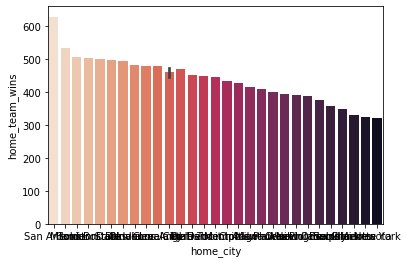

In [10]:
# plt.figure(figsize=(20,15))
display(sns.barplot(x='home_city', y='home_team_wins', data=home_history_totals, palette='rocket_r'))



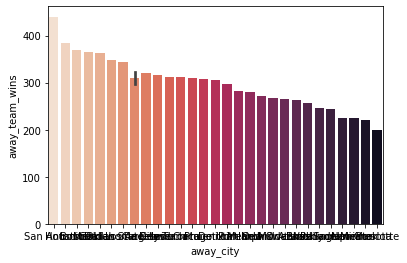

In [11]:
display(sns.barplot(x='away_city', y='away_team_wins', data=away_history_totals, palette='rocket_r'))


In [12]:
display(home_history_totals.columns)
display(away_history_totals.columns)

Index(['home_team_id', 'home_team_wins', 'home_team_losses', 'sum_of_fgm_home',
       'sum_of_fga_home', 'sum_of_fg3m_home', 'sum_of_fg3a_home',
       'sum_of_ftm_home', 'sum_of_fta_home', 'sum_of_oreb_home',
       'sum_of_dreb_home', 'sum_of_stl_home', 'sum_of_blk_home',
       'sum_of_to_home', 'sum_of_pf_home', 'home_nickname', 'home_yearfounded',
       'home_arena', 'home_city', 'home_conference'],
      dtype='object')

Index(['visitor_team_id', 'away_team_wins', 'away_team_losses',
       'sum_of_fgm_away', 'sum_of_fga_away', 'sum_of_fg3m_away',
       'sum_of_fg3a_away', 'sum_of_ftm_away', 'sum_of_fta_away',
       'sum_of_oreb_away', 'sum_of_dreb_away', 'sum_of_stl_away',
       'sum_of_blk_away', 'sum_of_to_away', 'sum_of_pf_away', 'away_nickname',
       'away_yearfounded', 'away_arena', 'away_city', 'away_conference'],
      dtype='object')

In [13]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=home_history_totals.home_city, y=home_history_totals.home_team_wins),
    go.Bar(name='Away Wins', x=away_history_totals.away_city, y=away_history_totals.away_team_wins),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

## consider doing both grouped and stacked charts

In [14]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=home_history_totals.home_nickname, y=home_history_totals.home_team_wins, marker_color='burlywood'),
    go.Bar(name='Away Wins', x=away_history_totals.away_nickname, y=away_history_totals.away_team_wins, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Wins Per Team by Travel',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [15]:
home_history_totals.sort_values(by='home_team_losses', ascending=False, inplace=True)
away_history_totals.sort_values(by='away_team_losses', ascending=False, inplace=True)
fig = go.Figure(data=[
    go.Bar(name='Home Losses', x=home_history_totals.home_nickname, y=home_history_totals.home_team_losses, marker_color='burlywood'),
    go.Bar(name='Away Losses', x=away_history_totals.away_nickname, y=away_history_totals.away_team_losses, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Losses Per Team by Travel',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()


In [16]:
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,oreb,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [17]:
players_df['total_boards'] = players_df.oreb + players_df.dreb

In [18]:
player_totals = players_df.groupby(by='player_id').sum()
player_totals.reset_index(inplace=True)

In [19]:
player_totals = pd.merge(player_totals,players_df[['player_id','player_name','start_position','team_city']], on=['player_id'])


player_totals.drop_duplicates(inplace=True)
# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

In [20]:
player_totals

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,stl,blk,to,pf,pts,plus_minus,total_boards,player_name,start_position,team_city
0,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski,G,Chicago
12,43,101501140,8053063820,11.0,28.0,1.883,6.0,13.0,2.750,5.0,...,3.0,2.0,5.0,5.0,33.0,-19.0,7.0,Chris Whitney,G,Washington
17,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,260.0,40.0,423.0,478.0,2754.0,239.0,840.0,Gary Payton,G,Miami
70,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,260.0,40.0,423.0,478.0,2754.0,239.0,840.0,Gary Payton,G,Boston
154,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,260.0,40.0,423.0,478.0,2754.0,239.0,840.0,Gary Payton,G,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221357,1629680,230904999,17716740305,18.0,58.0,3.179,10.0,43.0,2.115,6.0,...,27.0,13.0,14.0,23.0,52.0,12.0,28.0,Matisse Thybulle,G,Philadelphia
221361,1629684,99502439,8053063690,9.0,17.0,1.700,6.0,8.0,2.417,2.0,...,2.0,4.0,6.0,16.0,26.0,25.0,11.0,Grant Williams,F,Boston
221366,1629719,11900079,1610612747,6.0,9.0,0.667,0.0,0.0,0.000,4.0,...,0.0,1.0,1.0,4.0,16.0,6.0,10.0,Devontae Cacok,C,Los Angeles
221367,1629740,131402252,9663676440,16.0,34.0,2.411,7.0,17.0,2.350,10.0,...,3.0,3.0,4.0,12.0,49.0,-6.0,19.0,Nicolo Melli,F,New Orleans


In [21]:
player_totals.player_id.value_counts()

1713      14
201145    14
201584    13
101123    13
703       13
          ..
203108     1
2402       1
203510     1
203518     1
2558       1
Name: player_id, Length: 1343, dtype: int64

In [22]:
player_totals = players_df.groupby(by='player_id').sum()
player_totals.reset_index(inplace=True)

In [23]:
player_totals

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards
0,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,14.0,17.0,15.0,7.0,1.0,8.0,18.0,76.0,-4.0,17.0
1,43,101501140,8053063820,11.0,28.0,1.883,6.0,13.0,2.750,5.0,...,6.0,7.0,6.0,3.0,2.0,5.0,5.0,33.0,-19.0,7.0
2,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,671.0,840.0,1283.0,260.0,40.0,423.0,478.0,2754.0,239.0,840.0
3,57,3189370034,233538849733,500.0,1157.0,60.850,76.0,234.0,29.808,262.0,...,455.0,579.0,595.0,251.0,65.0,281.0,324.0,1338.0,428.0,579.0
4,72,1037312643,82141250114,138.0,336.0,19.743,3.0,9.0,2.333,42.0,...,93.0,123.0,154.0,37.0,5.0,69.0,102.0,321.0,-75.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1629680,230904999,17716740305,18.0,58.0,3.179,10.0,43.0,2.115,6.0,...,18.0,28.0,15.0,27.0,13.0,14.0,23.0,52.0,12.0,28.0
1339,1629684,99502439,8053063690,9.0,17.0,1.700,6.0,8.0,2.417,2.0,...,9.0,11.0,12.0,2.0,4.0,6.0,16.0,26.0,25.0,11.0
1340,1629719,11900079,1610612747,6.0,9.0,0.667,0.0,0.0,0.000,4.0,...,8.0,10.0,4.0,0.0,1.0,1.0,4.0,16.0,6.0,10.0
1341,1629740,131402252,9663676440,16.0,34.0,2.411,7.0,17.0,2.350,10.0,...,16.0,19.0,5.0,3.0,3.0,4.0,12.0,49.0,-6.0,19.0


In [24]:
player_totals.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [25]:
player_totals.player_id.value_counts()

2047       1
1628367    1
202702     1
2648       1
1626178    1
          ..
201970     1
201971     1
201972     1
201973     1
2048       1
Name: player_id, Length: 1343, dtype: int64

In [26]:
player_totals = pd.merge(player_totals,players_df[['player_id','player_name','start_position','team_city']], on=['player_id'])
player_totals.reset_index(inplace=True, drop=True)


# player_totals.drop_duplicates(inplace=True)
# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

In [27]:
player_totals.player_id.value_counts()

2544       1510
1717       1242
2546       1194
2225       1188
2730       1156
           ... 
1629094       1
203893        1
203510        1
201207        1
101238        1
Name: player_id, Length: 1343, dtype: int64

In [28]:
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0,8.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0,20.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0,7.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0,7.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0,1.0


In [29]:
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0,8.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0,20.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0,7.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0,7.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0,1.0


In [30]:
players_df['total_boards'] = players_df.oreb + players_df.dreb

In [31]:
player_totals = players_df.groupby(by='player_id').sum()
player_totals.reset_index(inplace=True)

In [32]:
player_totals.player_id.value_counts()

2047       1
1628367    1
202702     1
2648       1
1626178    1
          ..
201970     1
201971     1
201972     1
201973     1
2048       1
Name: player_id, Length: 1343, dtype: int64

In [33]:
player_totals = pd.merge(player_totals,players_df[['player_id','player_name','start_position','team_city']], on=['player_id'])
player_totals.reset_index(inplace=True, drop=True)
player_totals.drop_duplicates(inplace=True)


# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

In [34]:
player_totals.player_id.value_counts()

1713      14
201145    14
201584    13
101123    13
703       13
          ..
203108     1
2402       1
203510     1
203518     1
2558       1
Name: player_id, Length: 1343, dtype: int64

In [35]:
player_totals

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,stl,blk,to,pf,pts,plus_minus,total_boards,player_name,start_position,team_city
0,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski,G,Chicago
12,43,101501140,8053063820,11.0,28.0,1.883,6.0,13.0,2.750,5.0,...,3.0,2.0,5.0,5.0,33.0,-19.0,7.0,Chris Whitney,G,Washington
17,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,260.0,40.0,423.0,478.0,2754.0,239.0,840.0,Gary Payton,G,Miami
70,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,260.0,40.0,423.0,478.0,2754.0,239.0,840.0,Gary Payton,G,Boston
154,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,260.0,40.0,423.0,478.0,2754.0,239.0,840.0,Gary Payton,G,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221357,1629680,230904999,17716740305,18.0,58.0,3.179,10.0,43.0,2.115,6.0,...,27.0,13.0,14.0,23.0,52.0,12.0,28.0,Matisse Thybulle,G,Philadelphia
221361,1629684,99502439,8053063690,9.0,17.0,1.700,6.0,8.0,2.417,2.0,...,2.0,4.0,6.0,16.0,26.0,25.0,11.0,Grant Williams,F,Boston
221366,1629719,11900079,1610612747,6.0,9.0,0.667,0.0,0.0,0.000,4.0,...,0.0,1.0,1.0,4.0,16.0,6.0,10.0,Devontae Cacok,C,Los Angeles
221367,1629740,131402252,9663676440,16.0,34.0,2.411,7.0,17.0,2.350,10.0,...,3.0,3.0,4.0,12.0,49.0,-6.0,19.0,Nicolo Melli,F,New Orleans


In [36]:
player_totals.player == 56

AttributeError: 'DataFrame' object has no attribute 'player'

In [37]:
player_totals.player_id == 56

0         False
12        False
17         True
70         True
154        True
          ...  
221357    False
221361    False
221366    False
221367    False
221373    False
Name: player_id, Length: 4516, dtype: bool

In [38]:
[[player_totals.player_id == 56]]


[[0         False
  12        False
  17         True
  70         True
  154        True
            ...  
  221357    False
  221361    False
  221366    False
  221367    False
  221373    False
  Name: player_id, Length: 4516, dtype: bool]]

In [39]:
[player_totals.player_id == 56]


[0         False
 12        False
 17         True
 70         True
 154        True
           ...  
 221357    False
 221361    False
 221366    False
 221367    False
 221373    False
 Name: player_id, Length: 4516, dtype: bool]

In [40]:
player_totals[player_totals.player_id == 56]


,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,stl,blk,to,pf,pts,plus_minus,total_boards,player_name,start_position,team_city
17,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,260.0,40.0,423.0,478.0,2754.0,239.0,840.0,Gary Payton,G,Miami
70,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,260.0,40.0,423.0,478.0,2754.0,239.0,840.0,Gary Payton,G,Boston
154,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,260.0,40.0,423.0,478.0,2754.0,239.0,840.0,Gary Payton,G,Los Angeles


In [41]:
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0,8.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0,20.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0,7.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0,7.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0,1.0


In [42]:
players_df['total_boards'] = players_df.oreb + players_df.dreb

In [43]:
player_totals = players_df.groupby(by='player_id').sum()
player_totals.reset_index(inplace=True)

In [44]:
player_totals.player_id.value_counts()

2047       1
1628367    1
202702     1
2648       1
1626178    1
          ..
201970     1
201971     1
201972     1
201973     1
2048       1
Name: player_id, Length: 1343, dtype: int64

In [45]:
player_totals = pd.merge(player_totals,players_df[['player_id','player_name','start_position']], on=['player_id'])
player_totals.reset_index(inplace=True, drop=True)
player_totals.drop_duplicates(inplace=True)


# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

In [46]:
player_totals[player_totals.player_id == 56]


,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,ast,stl,blk,to,pf,pts,plus_minus,total_boards,player_name,start_position
17,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,1283.0,260.0,40.0,423.0,478.0,2754.0,239.0,840.0,Gary Payton,G


In [47]:
player_totals.player_id.value_counts()


101235     3
2407       3
2404       3
203924     3
1627827    3
          ..
200789     1
77         1
200779     1
203580     1
2049       1
Name: player_id, Length: 1343, dtype: int64

In [48]:
player_totals[player_totals.player_id == 101235]

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,ast,stl,blk,to,pf,pts,plus_minus,total_boards,player_name,start_position
115188,101235,1744448569,135291470496,457.0,991.0,37.808,124.0,283.0,34.333,199.0,...,121.0,67.0,55.0,120.0,193.0,1237.0,-198.0,437.0,Kelenna Azubuike,F
115232,101235,1744448569,135291470496,457.0,991.0,37.808,124.0,283.0,34.333,199.0,...,121.0,67.0,55.0,120.0,193.0,1237.0,-198.0,437.0,Kelenna Azubuike,G
115241,101235,1744448569,135291470496,457.0,991.0,37.808,124.0,283.0,34.333,199.0,...,121.0,67.0,55.0,120.0,193.0,1237.0,-198.0,437.0,Kelenna Azubuike,C


In [49]:
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0,8.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0,20.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0,7.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0,7.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0,1.0


In [50]:
players_df['total_boards'] = players_df.oreb + players_df.dreb

In [51]:
player_totals = players_df.groupby(by='player_id').sum()
player_totals.reset_index(inplace=True)

In [52]:
player_totals.player_id.value_counts()

2047       1
1628367    1
202702     1
2648       1
1626178    1
          ..
201970     1
201971     1
201972     1
201973     1
2048       1
Name: player_id, Length: 1343, dtype: int64

In [53]:
player_totals = pd.merge(player_totals,players_df[['player_id','player_name',]], on=['player_id'])
player_totals.reset_index(inplace=True, drop=True)
player_totals.drop_duplicates(inplace=True)


# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

In [54]:
player_totals.player_id.value_counts()


2047       1
1628367    1
202702     1
2648       1
1626178    1
          ..
201970     1
201971     1
201972     1
201973     1
2048       1
Name: player_id, Length: 1343, dtype: int64

In [55]:
player_totals.sort_values(by='total_boards', ascending=False)

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards,player_name
89700,2730,26064333056,1861868340101,7233.0,12419.0,671.028,6.0,69.0,6.000,5570.0,...,14659.0,1688.0,1092.0,2309.0,3398.0,3807.0,20042.0,2842.0,14659.0,Dwight Howard
74306,2544,36444294994,2432025240271,14928.0,29749.0,760.205,2239.0,6535.0,457.084,9026.0,...,11510.0,11022.0,2446.0,1183.0,5298.0,2892.0,41121.0,8071.0,11510.0,LeBron James
19792,1495,27004492505,1811939353875,7705.0,15308.0,567.917,17.0,101.0,15.500,4200.0,...,11466.0,3265.0,789.0,2244.0,2362.0,2488.0,19627.0,6495.0,11466.0,Tim Duncan
51586,2200,26018402783,1828045473455,7478.0,14765.0,569.564,149.0,435.0,86.403,4349.0,...,10727.0,3811.0,590.0,1822.0,2403.0,2480.0,19454.0,2519.0,10727.0,Pau Gasol
28760,1717,28109224520,2000381025564,9544.0,20198.0,588.402,1496.0,3916.0,418.810,6292.0,...,9546.0,3092.0,947.0,1017.0,2075.0,2824.0,26876.0,4933.0,9546.0,Dirk Nowitzki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124482,200978,20700597,1610612759,1.0,3.0,0.333,1.0,2.0,0.500,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,3.0,-11.0,0.0,Jeremy Richardson
206306,204014,42801827,3221225508,6.0,9.0,0.750,5.0,8.0,0.714,3.0,...,0.0,5.0,0.0,0.0,3.0,1.0,20.0,13.0,0.0,Damjan Rudez
10296,902,20300045,1610612748,2.0,7.0,0.286,0.0,0.0,0.000,0.0,...,0.0,1.0,1.0,0.0,0.0,2.0,4.0,-8.0,0.0,Bimbo Coles
149739,201628,41601767,3221225508,1.0,7.0,0.200,0.0,1.0,0.000,0.0,...,0.0,1.0,0.0,0.0,2.0,3.0,2.0,-12.0,0.0,Bobby Brown


In [56]:
player_totals.sort_values(by='total_boards', ascending=False).head(10)

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards,player_name
89700,2730,26064333056,1861868340101,7233.0,12419.0,671.028,6.0,69.0,6.000,5570.0,...,14659.0,1688.0,1092.0,2309.0,3398.0,3807.0,20042.0,2842.0,14659.0,Dwight Howard
74306,2544,36444294994,2432025240271,14928.0,29749.0,760.205,2239.0,6535.0,457.084,9026.0,...,11510.0,11022.0,2446.0,1183.0,5298.0,2892.0,41121.0,8071.0,11510.0,LeBron James
19792,1495,27004492505,1811939353875,7705.0,15308.0,567.917,17.0,101.0,15.500,4200.0,...,11466.0,3265.0,789.0,2244.0,2362.0,2488.0,19627.0,6495.0,11466.0,Tim Duncan
51586,2200,26018402783,1828045473455,7478.0,14765.0,569.564,149.0,435.0,86.403,4349.0,...,10727.0,3811.0,590.0,1822.0,2403.0,2480.0,19454.0,2519.0,10727.0,Pau Gasol
28760,1717,28109224520,2000381025564,9544.0,20198.0,588.402,1496.0,3916.0,418.810,6292.0,...,9546.0,3092.0,947.0,1017.0,2075.0,2824.0,26876.0,4933.0,9546.0,Dirk Nowitzki
7594,708,22468993945,1565515587349,6502.0,12932.0,493.229,55.0,254.0,42.166,3143.0,...,9496.0,3133.0,1156.0,1125.0,1871.0,2357.0,16202.0,3680.0,9496.0,Kevin Garnett
57629,2216,20896319472,1522029057753,6856.0,14602.0,442.978,183.0,658.0,90.930,3326.0,...,9402.0,1909.0,780.0,291.0,2173.0,2431.0,17221.0,-421.0,9402.0,Zach Randolph
147281,201599,17841138407,1275605294767,3261.0,4831.0,530.622,1.0,10.0,1.000,1682.0,...,9368.0,772.0,533.0,1403.0,1171.0,2225.0,8205.0,1615.0,9368.0,DeAndre Jordan
116091,200746,23721673529,1705638910491,8521.0,17442.0,514.186,203.0,651.0,109.806,3894.0,...,8963.0,2132.0,790.0,1181.0,1689.0,2595.0,21139.0,2700.0,8963.0,LaMarcus Aldridge
50726,2199,19171740666,1385126962559,2955.0,4777.0,524.232,0.0,7.0,0.000,1806.0,...,8626.0,727.0,492.0,961.0,1250.0,2515.0,7716.0,769.0,8626.0,Tyson Chandler


In [57]:
# Create figure
fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=[0, 0.5, 1, 2, 2.2], y=[1.23, 2.5, 0.42, 3, 1])
)

# Add images
fig.add_layout_image(
        dict(
            source="https://images.plot.ly/language-icons/api-home/python-logo.png",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

# Set templates
fig.update_layout(template="plotly_white")

fig.show()

In [58]:
# Create figure
fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=[0, 0.5, 1, 2, 2.2], y=[1.23, 2.5, 0.42, 3, 1])
)

# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

# Set templates
fig.update_layout(template="plotly_white")

fig.show()

In [59]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=player_totals.player_name, y=player_totals.total_boards, marker_color='burlywood'),
    # go.Bar(name='Away Wins', x=away_history_totals.away_nickname, y=away_history_totals.away_team_wins, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Wins Per Team by Travel',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [60]:
player_totals = player_totals.sort_values(by='total_boards', ascending=False).head(10)

In [61]:
player_totals = player_totals.sort_values(by='total_boards', ascending=False)

In [62]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=player_totals.player_name, y=player_totals.total_boards, marker_color='burlywood'),
    # go.Bar(name='Away Wins', x=away_history_totals.away_nickname, y=away_history_totals.away_team_wins, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Wins Per Team by Travel',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [63]:
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0,8.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0,20.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0,7.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0,7.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0,1.0


In [64]:
players_df['total_boards'] = players_df.oreb + players_df.dreb

In [65]:
player_totals = players_df.groupby(by='player_id').sum()
player_totals.reset_index(inplace=True)

In [66]:
player_totals.player_id.value_counts()

2047       1
1628367    1
202702     1
2648       1
1626178    1
          ..
201970     1
201971     1
201972     1
201973     1
2048       1
Name: player_id, Length: 1343, dtype: int64

In [67]:
player_totals = pd.merge(player_totals,players_df[['player_id','player_name',]], on=['player_id'])
player_totals.reset_index(inplace=True, drop=True)
player_totals.drop_duplicates(inplace=True)


# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

In [68]:
player_totals = player_totals.sort_values(by='total_boards', ascending=False)

In [69]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=player_totals.player_name, y=player_totals.total_boards, marker_color='burlywood'),
    # go.Bar(name='Away Wins', x=away_history_totals.away_nickname, y=away_history_totals.away_team_wins, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Wins Per Team by Travel',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [70]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=player_totals.player_name[:15], y=player_totals.total_boards, marker_color='burlywood'),
    # go.Bar(name='Away Wins', x=away_history_totals.away_nickname, y=away_history_totals.away_team_wins, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Wins Per Team by Travel',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [71]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=player_totals.player_name[:16], y=player_totals.total_boards, marker_color='burlywood'),
    # go.Bar(name='Away Wins', x=away_history_totals.away_nickname, y=away_history_totals.away_team_wins, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Wins Per Team by Travel',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [72]:
player_totals_boards = player_totals_boards.sort_values(by='total_boards', ascending=False)

NameError: name 'player_totals_boards' is not defined

In [73]:
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0,8.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0,20.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0,7.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0,7.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0,1.0


In [74]:
from IPython.display import display
from plotly.subplots import make_subplots
import pandas as pd
import matplotlib as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import pickle



In [75]:
df = pd.read_pickle('../data/main_df.pkl')
players_df = pd.read_pickle('../data/details_df.pkl')

~~best overall team by wins~~
   - ~~home~~
   - ~~away~~

 ~~most losses~~
 - ~~home~~
 - ~~away~~

 wins by year plots by year all teams
~~best overall by conference?~~
defense wins games - pressure busts pipes -  analyze impact
pressure makes diamonds - look into highest scoring individuals
   - overall
   - by conference
 time series of scoring?
 look into relationship between home team win pct at arenas vs centers vs other for funsies

 look into raptor rating


In [76]:
# plt.figure(figsize=(20,15))
# df.hist(figsize=(20,15));

In [77]:
df['away_team_wins'] = df['home_team_wins'].apply(lambda x: 1.0 if x == 0 else 0)
df['home_team_losses'] = df['away_team_wins'].apply(lambda x: 1.0 if x == 1 else 0)
df['away_team_losses'] = df['home_team_wins'].apply(lambda x: 1.0 if x == 1 else 0)

In [78]:
home_history_totals = df.groupby(by='home_team_id').sum()[['home_team_wins','home_team_losses','sum_of_fgm_home',
       'sum_of_fga_home', 'sum_of_fg3m_home', 'sum_of_fg3a_home',
       'sum_of_ftm_home', 'sum_of_fta_home', 'sum_of_oreb_home',
       'sum_of_dreb_home', 'sum_of_stl_home', 'sum_of_blk_home',
       'sum_of_to_home', 'sum_of_pf_home']]

away_history_totals = df.copy().groupby(by='visitor_team_id').sum()[['away_team_wins','away_team_losses','sum_of_fgm_away',
       'sum_of_fga_away', 'sum_of_fg3m_away', 'sum_of_fg3a_away',
       'sum_of_ftm_away', 'sum_of_fta_away', 'sum_of_oreb_away',
       'sum_of_dreb_away', 'sum_of_stl_away', 'sum_of_blk_away',
       'sum_of_to_away', 'sum_of_pf_away']]

home_history_totals.reset_index(inplace=True)
away_history_totals.reset_index(inplace=True)



In [79]:
home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])


away_history_totals = away_history_totals.merge(df[['visitor_team_id','away_nickname', 'away_yearfounded','away_arena', 'away_city', 'away_conference']],on=['visitor_team_id'])



In [80]:
home_history_totals.drop_duplicates(inplace=True)
away_history_totals.drop_duplicates(inplace=True)
home_history_totals.reset_index(drop=True, inplace=True)
away_history_totals.reset_index(drop=True, inplace=True)

In [81]:
display(home_history_totals.head())
display(away_history_totals.head())


,home_team_id,home_team_wins,home_team_losses,sum_of_fgm_home,sum_of_fga_home,sum_of_fg3m_home,sum_of_fg3a_home,sum_of_ftm_home,sum_of_fta_home,sum_of_oreb_home,sum_of_dreb_home,sum_of_stl_home,sum_of_blk_home,sum_of_to_home,sum_of_pf_home,home_nickname,home_yearfounded,home_arena,home_city,home_conference
0,1610612737,416,324.0,19385.0,41763.0,3796.0,10504.0,9162.0,12011.0,5167.0,15750.0,3783.0,2565.0,7014.0,9000.0,Hawks,1949,State Farm Arena,Atlanta,East
1,1610612738,502,278.0,20328.0,42984.0,4034.0,10975.0,9857.0,12542.0,4680.0,16474.0,4010.0,2426.0,7179.0,9395.0,Celtics,1946,TD Garden,Boston,East
2,1610612739,479,295.0,20529.0,43932.0,4010.0,10713.0,10247.0,13576.0,5884.0,16511.0,3652.0,2497.0,6962.0,8716.0,Cavaliers,1970,Quicken Loans Arena,Cleveland,East
3,1610612740,388,324.0,18656.0,39840.0,3126.0,8789.0,8858.0,11446.0,5330.0,15389.0,3683.0,2523.0,6195.0,8307.0,Pelicans,2002,Smoothie King Center,New Orleans,West
4,1610612741,429,319.0,18552.0,41627.0,3114.0,8762.0,8995.0,11655.0,5792.0,16242.0,3543.0,2674.0,6651.0,8810.0,Bulls,1966,United Center,Chicago,East


,visitor_team_id,away_team_wins,away_team_losses,sum_of_fgm_away,sum_of_fga_away,sum_of_fg3m_away,sum_of_fg3a_away,sum_of_ftm_away,sum_of_fta_away,sum_of_oreb_away,sum_of_dreb_away,sum_of_stl_away,sum_of_blk_away,sum_of_to_away,sum_of_pf_away,away_nickname,away_yearfounded,away_arena,away_city,away_conference
0,1610612737,263.0,483.0,18425.0,40831.0,3667.0,10305.0,8468.0,11272.0,4928.0,15195.0,3826.0,2544.0,7370.0,9276.0,Hawks,1949,State Farm Arena,Atlanta,East
1,1610612738,370.0,402.0,19721.0,42703.0,4007.0,10910.0,9760.0,12370.0,4581.0,16020.0,3925.0,2150.0,7274.0,10038.0,Celtics,1946,TD Garden,Boston,East
2,1610612739,321.0,444.0,19877.0,44005.0,3810.0,10832.0,10059.0,13428.0,5615.0,16000.0,3563.0,2000.0,7291.0,9451.0,Cavaliers,1970,Quicken Loans Arena,Cleveland,East
3,1610612740,267.0,454.0,18426.0,40332.0,3246.0,8933.0,8526.0,11020.0,5151.0,15033.0,3475.0,2170.0,6538.0,8874.0,Pelicans,2002,Smoothie King Center,New Orleans,West
4,1610612741,310.0,428.0,18171.0,40432.0,3128.0,8765.0,8716.0,11251.0,5302.0,15476.0,3382.0,2195.0,6976.0,9042.0,Bulls,1966,United Center,Chicago,East


In [82]:
home_history_totals.sort_values(by='home_team_wins', ascending=False, inplace=True)
away_history_totals.sort_values(by='away_team_wins', ascending=False, inplace=True)

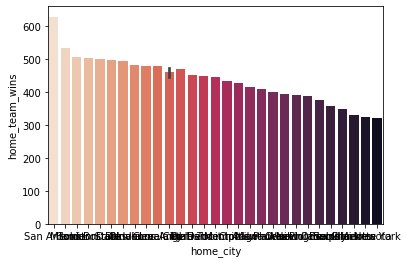

In [83]:
# plt.figure(figsize=(20,15))
display(sns.barplot(x='home_city', y='home_team_wins', data=home_history_totals, palette='rocket_r'))



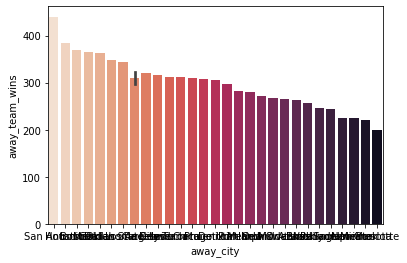

In [84]:
display(sns.barplot(x='away_city', y='away_team_wins', data=away_history_totals, palette='rocket_r'))


In [85]:
display(home_history_totals.columns)
display(away_history_totals.columns)

Index(['home_team_id', 'home_team_wins', 'home_team_losses', 'sum_of_fgm_home',
       'sum_of_fga_home', 'sum_of_fg3m_home', 'sum_of_fg3a_home',
       'sum_of_ftm_home', 'sum_of_fta_home', 'sum_of_oreb_home',
       'sum_of_dreb_home', 'sum_of_stl_home', 'sum_of_blk_home',
       'sum_of_to_home', 'sum_of_pf_home', 'home_nickname', 'home_yearfounded',
       'home_arena', 'home_city', 'home_conference'],
      dtype='object')

Index(['visitor_team_id', 'away_team_wins', 'away_team_losses',
       'sum_of_fgm_away', 'sum_of_fga_away', 'sum_of_fg3m_away',
       'sum_of_fg3a_away', 'sum_of_ftm_away', 'sum_of_fta_away',
       'sum_of_oreb_away', 'sum_of_dreb_away', 'sum_of_stl_away',
       'sum_of_blk_away', 'sum_of_to_away', 'sum_of_pf_away', 'away_nickname',
       'away_yearfounded', 'away_arena', 'away_city', 'away_conference'],
      dtype='object')

In [86]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=home_history_totals.home_city, y=home_history_totals.home_team_wins),
    go.Bar(name='Away Wins', x=away_history_totals.away_city, y=away_history_totals.away_team_wins),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

## consider doing both grouped and stacked charts

In [87]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=home_history_totals.home_nickname, y=home_history_totals.home_team_wins, marker_color='burlywood'),
    go.Bar(name='Away Wins', x=away_history_totals.away_nickname, y=away_history_totals.away_team_wins, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Wins Per Team by Travel',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [88]:
home_history_totals.sort_values(by='home_team_losses', ascending=False, inplace=True)
away_history_totals.sort_values(by='away_team_losses', ascending=False, inplace=True)
fig = go.Figure(data=[
    go.Bar(name='Home Losses', x=home_history_totals.home_nickname, y=home_history_totals.home_team_losses, marker_color='burlywood'),
    go.Bar(name='Away Losses', x=away_history_totals.away_nickname, y=away_history_totals.away_team_losses, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Losses Per Team by Travel',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()


In [89]:
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,oreb,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [90]:
players_df['total_boards'] = players_df.oreb + players_df.dreb

In [91]:
player_totals_boards = players_df.groupby(by='player_id').sum()
player_totals_boards.reset_index(inplace=True)

In [92]:
player_totals_boards.player_id.value_counts()

2047       1
1628367    1
202702     1
2648       1
1626178    1
          ..
201970     1
201971     1
201972     1
201973     1
2048       1
Name: player_id, Length: 1343, dtype: int64

In [93]:
player_totals_boards = pd.merge(player_totals_boards,players_df[['player_id','player_name',]], on=['player_id'])
player_totals.reset_index(inplace=True, drop=True)
player_totals.drop_duplicates(inplace=True)


# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

In [94]:
player_totals_boards = player_totals_boards.sort_values(by='total_boards', ascending=False)

In [95]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=player_totals_boards.player_name[:16], y=player_totals.total_boards, marker_color='burlywood'),
    # go.Bar(name='Away Wins', x=away_history_totals.away_nickname, y=away_history_totals.away_team_wins, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Total Rebounds By Player',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [96]:
players_df = pd.read_pickle('../data/details_df.pkl')
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,oreb,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [97]:
players_df = pd.read_pickle('../data/details_df.pkl')
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,oreb,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [98]:
players_df['total_boards'] = players_df.oreb + players_df.dreb

In [99]:
player_totals_boards = players_df.groupby(by='player_id').sum()
player_totals_boards.reset_index(inplace=True)

In [100]:
player_totals_boards.player_id.value_counts()

2047       1
1628367    1
202702     1
2648       1
1626178    1
          ..
201970     1
201971     1
201972     1
201973     1
2048       1
Name: player_id, Length: 1343, dtype: int64

In [101]:
player_totals_boards = pd.merge(player_totals_boards,players_df[['player_id','player_name',]], on=['player_id'])
player_totals.reset_index(inplace=True, drop=True)
player_totals.drop_duplicates(inplace=True)


# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

In [102]:
player_totals_boards = player_totals_boards.sort_values(by='total_boards', ascending=False)

In [103]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=player_totals_boards.player_name[:16], y=player_totals.total_boards, marker_color='burlywood'),
    # go.Bar(name='Away Wins', x=away_history_totals.away_nickname, y=away_history_totals.away_team_wins, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Total Rebounds By Player',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [104]:
player_totals_boards = player_totals_boards.sort_values(by='total_boards', ascending=False)
player_totals_boards

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards,player_name
90190,2730,26064333056,1861868340101,7233.0,12419.0,671.028,6.0,69.0,6.000,5570.0,...,14659.0,1688.0,1092.0,2309.0,3398.0,3807.0,20042.0,2842.0,14659.0,Dwight Howard
89910,2730,26064333056,1861868340101,7233.0,12419.0,671.028,6.0,69.0,6.000,5570.0,...,14659.0,1688.0,1092.0,2309.0,3398.0,3807.0,20042.0,2842.0,14659.0,Dwight Howard
90124,2730,26064333056,1861868340101,7233.0,12419.0,671.028,6.0,69.0,6.000,5570.0,...,14659.0,1688.0,1092.0,2309.0,3398.0,3807.0,20042.0,2842.0,14659.0,Dwight Howard
90123,2730,26064333056,1861868340101,7233.0,12419.0,671.028,6.0,69.0,6.000,5570.0,...,14659.0,1688.0,1092.0,2309.0,3398.0,3807.0,20042.0,2842.0,14659.0,Dwight Howard
90122,2730,26064333056,1861868340101,7233.0,12419.0,671.028,6.0,69.0,6.000,5570.0,...,14659.0,1688.0,1092.0,2309.0,3398.0,3807.0,20042.0,2842.0,14659.0,Dwight Howard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162672,202227,21100906,1610612748,3.0,5.0,0.600,1.0,3.0,0.333,0.0,...,0.0,2.0,0.0,0.0,1.0,1.0,7.0,-5.0,0.0,Terrel Harris
206307,204014,42801827,3221225508,6.0,9.0,0.750,5.0,8.0,0.714,3.0,...,0.0,5.0,0.0,0.0,3.0,1.0,20.0,13.0,0.0,Damjan Rudez
206306,204014,42801827,3221225508,6.0,9.0,0.750,5.0,8.0,0.714,3.0,...,0.0,5.0,0.0,0.0,3.0,1.0,20.0,13.0,0.0,Damjan Rudez
100071,2766,20500432,1610612763,5.0,7.0,0.714,0.0,0.0,0.000,0.0,...,0.0,3.0,0.0,0.0,2.0,1.0,10.0,-4.0,0.0,Antonio Burks


In [105]:
players_df = pd.read_pickle('../data/details_df.pkl')
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,oreb,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [106]:
players_df['total_boards'] = players_df.oreb + players_df.dreb

In [107]:
player_totals_boards = players_df.groupby(by='player_id').sum()
player_totals_boards.reset_index(inplace=True)
player_totals_boards.head()

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards
0,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,14.0,17.0,15.0,7.0,1.0,8.0,18.0,76.0,-4.0,17.0
1,43,101501140,8053063820,11.0,28.0,1.883,6.0,13.0,2.750,5.0,...,6.0,7.0,6.0,3.0,2.0,5.0,5.0,33.0,-19.0,7.0
2,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,671.0,840.0,1283.0,260.0,40.0,423.0,478.0,2754.0,239.0,840.0
3,57,3189370034,233538849733,500.0,1157.0,60.850,76.0,234.0,29.808,262.0,...,455.0,579.0,595.0,251.0,65.0,281.0,324.0,1338.0,428.0,579.0
4,72,1037312643,82141250114,138.0,336.0,19.743,3.0,9.0,2.333,42.0,...,93.0,123.0,154.0,37.0,5.0,69.0,102.0,321.0,-75.0,123.0


In [108]:
player_totals_boards.player_id.value_counts()

2047       1
1628367    1
202702     1
2648       1
1626178    1
          ..
201970     1
201971     1
201972     1
201973     1
2048       1
Name: player_id, Length: 1343, dtype: int64

In [109]:
player_totals_boards = pd.merge(player_totals_boards,players_df[['player_id','player_name',]], on=['player_id'])
player_totals.reset_index(inplace=True, drop=True)
player_totals.drop_duplicates(inplace=True)
player_totals_boards.head()

# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards,player_name
0,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,17.0,15.0,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski
1,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,17.0,15.0,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski
2,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,17.0,15.0,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski
3,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,17.0,15.0,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski
4,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,17.0,15.0,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski


In [110]:
players_df = pd.read_pickle('../data/details_df.pkl')
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,oreb,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [111]:
players_df['total_boards'] = players_df.oreb + players_df.dreb

In [112]:
player_totals_boards = players_df.groupby(by='player_id').sum()
player_totals_boards.reset_index(inplace=True)
player_totals_boards.head()

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards
0,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,14.0,17.0,15.0,7.0,1.0,8.0,18.0,76.0,-4.0,17.0
1,43,101501140,8053063820,11.0,28.0,1.883,6.0,13.0,2.750,5.0,...,6.0,7.0,6.0,3.0,2.0,5.0,5.0,33.0,-19.0,7.0
2,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,671.0,840.0,1283.0,260.0,40.0,423.0,478.0,2754.0,239.0,840.0
3,57,3189370034,233538849733,500.0,1157.0,60.850,76.0,234.0,29.808,262.0,...,455.0,579.0,595.0,251.0,65.0,281.0,324.0,1338.0,428.0,579.0
4,72,1037312643,82141250114,138.0,336.0,19.743,3.0,9.0,2.333,42.0,...,93.0,123.0,154.0,37.0,5.0,69.0,102.0,321.0,-75.0,123.0


In [113]:
player_totals_boards.player_id.value_counts()

2047       1
1628367    1
202702     1
2648       1
1626178    1
          ..
201970     1
201971     1
201972     1
201973     1
2048       1
Name: player_id, Length: 1343, dtype: int64

In [114]:
player_totals_boards = pd.merge(player_totals_boards,players_df[['player_id','player_name',]], on=['player_id'])
player_totals_boards.reset_index(inplace=True, drop=True)
player_totals_boards.drop_duplicates(inplace=True)
player_totals_boards.head()

# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards,player_name
0,15,244905925,19327352892,26.0,58.0,4.467,12.0,28.0,3.625,12.0,...,17.0,15.0,7.0,1.0,8.0,18.0,76.0,-4.0,17.0,Eric Piatkowski
12,43,101501140,8053063820,11.0,28.0,1.883,6.0,13.0,2.750,5.0,...,7.0,6.0,3.0,2.0,5.0,5.0,33.0,-19.0,7.0,Chris Whitney
17,56,5494232084,388157671324,1088.0,2428.0,105.049,157.0,523.0,60.189,421.0,...,840.0,1283.0,260.0,40.0,423.0,478.0,2754.0,239.0,840.0,Gary Payton
258,57,3189370034,233538849733,500.0,1157.0,60.850,76.0,234.0,29.808,262.0,...,579.0,595.0,251.0,65.0,281.0,324.0,1338.0,428.0,579.0,Doug Christie
403,72,1037312643,82141250114,138.0,336.0,19.743,3.0,9.0,2.333,42.0,...,123.0,154.0,37.0,5.0,69.0,102.0,321.0,-75.0,123.0,Kenny Anderson


In [115]:
player_totals_boards = player_totals_boards.sort_values(by='total_boards', ascending=False)
player_totals_boards

,player_id,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,reb,ast,stl,blk,to,pf,pts,plus_minus,total_boards,player_name
89700,2730,26064333056,1861868340101,7233.0,12419.0,671.028,6.0,69.0,6.000,5570.0,...,14659.0,1688.0,1092.0,2309.0,3398.0,3807.0,20042.0,2842.0,14659.0,Dwight Howard
74306,2544,36444294994,2432025240271,14928.0,29749.0,760.205,2239.0,6535.0,457.084,9026.0,...,11510.0,11022.0,2446.0,1183.0,5298.0,2892.0,41121.0,8071.0,11510.0,LeBron James
19792,1495,27004492505,1811939353875,7705.0,15308.0,567.917,17.0,101.0,15.500,4200.0,...,11466.0,3265.0,789.0,2244.0,2362.0,2488.0,19627.0,6495.0,11466.0,Tim Duncan
51586,2200,26018402783,1828045473455,7478.0,14765.0,569.564,149.0,435.0,86.403,4349.0,...,10727.0,3811.0,590.0,1822.0,2403.0,2480.0,19454.0,2519.0,10727.0,Pau Gasol
28760,1717,28109224520,2000381025564,9544.0,20198.0,588.402,1496.0,3916.0,418.810,6292.0,...,9546.0,3092.0,947.0,1017.0,2075.0,2824.0,26876.0,4933.0,9546.0,Dirk Nowitzki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124482,200978,20700597,1610612759,1.0,3.0,0.333,1.0,2.0,0.500,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,3.0,-11.0,0.0,Jeremy Richardson
206306,204014,42801827,3221225508,6.0,9.0,0.750,5.0,8.0,0.714,3.0,...,0.0,5.0,0.0,0.0,3.0,1.0,20.0,13.0,0.0,Damjan Rudez
10296,902,20300045,1610612748,2.0,7.0,0.286,0.0,0.0,0.000,0.0,...,0.0,1.0,1.0,0.0,0.0,2.0,4.0,-8.0,0.0,Bimbo Coles
149739,201628,41601767,3221225508,1.0,7.0,0.200,0.0,1.0,0.000,0.0,...,0.0,1.0,0.0,0.0,2.0,3.0,2.0,-12.0,0.0,Bobby Brown


In [116]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=player_totals_boards.player_name[:16], y=player_totals.total_boards, marker_color='burlywood'),
    # go.Bar(name='Away Wins', x=away_history_totals.away_nickname, y=away_history_totals.away_team_wins, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Total Rebounds By Player',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [117]:
positions = pd.merge(positions,players_df[['player_id','player_name','start_position','team_city']], on=['player_id'])
positions.reset_index(inplace=True, drop=True)
positions.drop_duplicates(inplace=True)

NameError: name 'positions' is not defined

In [118]:
positions = players_df.groupby(by='player_id').sum()
positions.reset_index(inplace=True)

In [119]:
positions = pd.merge(positions,players_df[['player_id','player_name','start_position','team_city']], on=['player_id'])
positions.reset_index(inplace=True, drop=True)
positions.drop_duplicates(inplace=True)

In [120]:
positions.player_id.value_counts()

1713      14
201145    14
201584    13
101123    13
703       13
          ..
203108     1
2402       1
203510     1
203518     1
2558       1
Name: player_id, Length: 1343, dtype: int64

In [121]:
positions = pd.merge(positions,players_df[['player_id','player_name','start_position','team_city']], on=['player_id'])
positions.drop_duplicates(subset=['player_id'],inplace=True)

positions.reset_index(inplace=True, drop=True)

In [122]:
positions.player_id.value_counts()

2047       1
1628367    1
202702     1
2648       1
1626178    1
          ..
201970     1
201971     1
201972     1
201973     1
2048       1
Name: player_id, Length: 1343, dtype: int64

In [123]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.scatter_polar(positions, r="total_boards", theta="start_position")
fig.show()
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

# Set templates
fig.update_layout(template="plotly_white")

fig.show()

ValueError: Value of 'theta' is not the name of a column in 'data_frame'. Expected one of ['player_id', 'game_id', 'team_id', 'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'to', 'pf', 'pts', 'plus_minus', 'total_boards', 'player_name_x', 'start_position_x', 'team_city_x', 'player_name_y', 'start_position_y', 'team_city_y'] but received: start_position

In [124]:
players_df = pd.read_pickle('../data/details_df.pkl')
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,oreb,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [125]:
players_df['total_boards'] = players_df.oreb + players_df.dreb

In [126]:
player_totals_boards = players_df.groupby(by='player_id').sum()
player_totals_boards.reset_index(inplace=True)

In [127]:
player_totals_boards.player_id.value_counts()

2047       1
1628367    1
202702     1
2648       1
1626178    1
          ..
201970     1
201971     1
201972     1
201973     1
2048       1
Name: player_id, Length: 1343, dtype: int64

In [128]:
player_totals_boards = pd.merge(player_totals_boards,players_df[['player_id','player_name','start_position','team_city']], on=['player_id'])
player_totals_boards.reset_index(inplace=True, drop=True)
player_totals_boards.drop_duplicates(subset=['player_id'],inplace=True)

# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

In [129]:
player_totals_boards = player_totals_boards.sort_values(by='total_boards', ascending=False)


In [130]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=player_totals_boards.player_name[:16], y=player_totals.total_boards, marker_color='burlywood'),
    # go.Bar(name='Away Wins', x=away_history_totals.away_nickname, y=away_history_totals.away_team_wins, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Total Rebounds By Player',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [131]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.scatter_polar(player_totals_boards, r="total_boards", theta="start_position")
fig.show()
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

# Set templates
fig.update_layout(template="plotly_white")

fig.show()

In [132]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.scatter(player_totals_boards, theta="start_position", y="total_boards")
fig.show()
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

# Set templates
fig.update_layout(template="plotly_white")

fig.show()

TypeError: scatter() got an unexpected keyword argument 'theta'

In [133]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.scatter(player_totals_boards, x="start_position", y="total_boards")
fig.show()
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

# Set templates
fig.update_layout(template="plotly_white")

fig.show()

In [134]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.scatter(player_totals_boards, x="start_position", y="total_boards")
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

# Set templates
fig.update_layout(template="plotly_white")

fig.show()

In [135]:
fig = px.hist(player_totals_boards, x="start_position", y="total_boards")

AttributeError: module 'plotly.express' has no attribute 'hist'

In [136]:
fig = px.histogram(player_totals_boards, x="start_position", y="total_boards")

In [137]:
fig = px.histogram(player_totals_boards, x="start_position", y="total_boards")
fig.show()

In [138]:
players_df = pd.read_pickle('../data/details_df.pkl')
players_df.head()

,game_id,team_id,team_abbreviation,team_city,player_id,player_name,start_position,min,fgm,fga,...,oreb,dreb,reb,ast,stl,blk,to,pf,pts,plus_minus
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,27:08,3.0,11.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,34:55,17.0,28.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,26:25,4.0,11.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,27:35,1.0,5.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,22:17,2.0,8.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [139]:
players_df['total_boards'] = players_df.oreb + players_df.dreb

In [140]:
player_totals_boards = players_df.groupby(by='player_id').sum()
player_totals_boards.reset_index(inplace=True)

In [141]:
player_totals_boards.player_id.value_counts()

2047       1
1628367    1
202702     1
2648       1
1626178    1
          ..
201970     1
201971     1
201972     1
201973     1
2048       1
Name: player_id, Length: 1343, dtype: int64

In [142]:
player_totals_boards = player_totals_boards.sort_values(by='total_boards', ascending=False)
player_totals_boards = pd.merge(player_totals_boards,players_df[['player_id','player_name','start_position','team_city']], on=['player_id'])
player_totals_boards.reset_index(inplace=True, drop=True)
player_totals_boards.drop_duplicates(subset=['player_id'],inplace=True)

# home_history_totals.reset_index(drop=True, inplace=True)
# home_history_totals = pd.merge(home_history_totals, df[['home_team_id','home_nickname', 'home_yearfounded','home_arena', 'home_city', 'home_conference']], on=['home_team_id'])

In [143]:
fig = go.Figure(data=[
    go.Bar(name='Home Wins', x=player_totals_boards.player_name[:16], y=player_totals.total_boards, marker_color='burlywood'),
    # go.Bar(name='Away Wins', x=away_history_totals.away_nickname, y=away_history_totals.away_team_wins, marker_color='#b36360'),
])
fig.update_layout(title=dict(text='Total Rebounds By Player',
                             y=0.9,x=0.5,
                             xanchor='auto', 
                             yanchor='middle'),
                  barmode='group',
                  plot_bgcolor='lightslategrey',
                  xaxis_title="Team Name",
                  yaxis_title="Total Wins",
                  bargap=0.25,
                  bargroupgap=0.15,
                  height=500,
                  width=1000)
fig.show()

In [144]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.scatter(player_totals_boards, x="start_position", y="total_boards")
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

fig.show()

In [145]:
fig = px.histogram(player_totals_boards, x="start_position", y="total_boards")
fig.show()

In [146]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.scatter(player_totals_boards, hover_name='player_name', x="start_position", y="total_boards")
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

fig.show()

In [147]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.swarm(player_totals_boards, hover_name='player_name', x="start_position", y="total_boards")
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

fig.show()

AttributeError: module 'plotly.express' has no attribute 'swarm'

In [148]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.strip(player_totals_boards, hover_name='player_name', x="start_position", y="total_boards")
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

fig.show()

In [149]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.strip(player_totals_boards, hover_name='player_name', x="start_position", y="total_boards",color='rocket')
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['player_id', 'game_id', 'team_id', 'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'to', 'pf', 'pts', 'plus_minus', 'total_boards', 'player_name', 'start_position', 'team_city'] but received: rocket

In [150]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.strip(player_totals_boards, hover_name='player_name', x="start_position", y="total_boards",color='total_boards')
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

fig.show()

In [151]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.strip(player_totals_boards, hover_name='player_name', x="start_position", y="total_boards",color='total_boards',color_discrete_sequence='rocket')
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of box.marker
        Received value: 'r'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [152]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.strip(player_totals_boards, hover_name='player_name', x="start_position", y="total_boards",color='total_boards',color_discrete_sequence=["rgb(206,159,52)", "rgb(237, 246, 249)", "rgb(96, 87, 112)", "rgb(97,167,33)", "rgb(220,57,116)", 'rgb(247, 196, 165)'])
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

fig.show()

In [153]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.jitter(player_totals_boards, hover_name='player_name', x="start_position", y="total_boards",color='total_boards',color_discrete_sequence=["rgb(206,159,52)", "rgb(237, 246, 249)", "rgb(96, 87, 112)", "rgb(97,167,33)", "rgb(220,57,116)", 'rgb(247, 196, 165)'])
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

fig.show()

AttributeError: module 'plotly.express' has no attribute 'jitter'

In [154]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.strip(player_totals_boards, hover_name='player_name', x="start_position", y="total_boards",color_discrete_sequence=["rgb(206,159,52)", "rgb(237, 246, 249)", "rgb(96, 87, 112)", "rgb(97,167,33)", "rgb(220,57,116)", 'rgb(247, 196, 165)'])
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

fig.show()

In [155]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.strip(player_totals_boards, hover_name='player_name', x="start_position", y="total_boards",color_discrete_sequence=["rgb(206,159,52)", "rgb(237, 246, 249)", "rgb(96, 87, 112)"])
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

fig.show()

In [156]:
# Create figure
fig = go.Figure()

# Add trace
fig = px.box(player_totals_boards, hover_name='player_name', x="start_position", y="total_boards",color_discrete_sequence=["rgb(206,159,52)", "rgb(237, 246, 249)", "rgb(96, 87, 112)"])
# Add images
fig.add_layout_image(
        dict(
            source="https://media.giphy.com/media/XbDWBEVcvBhJhLjZ16/giphy.gif",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=2,
            sizey=2,
            sizing="stretch",
            opacity=0.5,
            layer="below")
)

fig.show()

In [157]:
from IPython.display import display
from plotly.subplots import make_subplots
import pandas as pd
import matplotlib as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import pickle

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output



In [158]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("x-axis:"),
    dcc.Checklist(
        id='x-axis', 
        options=[{'value': x, 'label': x} 
                 for x in ['smoker', 'day', 'time', 'sex']],
        value=['time'], 
        labelStyle={'display': 'inline-block'}
    ),
    html.P("y-axis:"),
    dcc.RadioItems(
        id='y-axis', 
        options=[{'value': x, 'label': x} 
                 for x in ['total_bill', 'tip', 'size']],
        value='total_bill', 
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id="box-plot"),
])

@app.callback(
    Output("box-plot", "figure"), 
    [Input("x-axis", "value"), 
     Input("y-axis", "value")])

SyntaxError: unexpected EOF while parsing (<ipython-input-158-0ae267619091>, line 26)

In [159]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("x-axis:"),
    dcc.Checklist(
        id='x-axis', 
        options=[{'value': x, 'label': x} 
                 for x in ['smoker', 'day', 'time', 'sex']],
        value=['time'], 
        labelStyle={'display': 'inline-block'}
    ),
    html.P("y-axis:"),
    dcc.RadioItems(
        id='y-axis', 
        options=[{'value': x, 'label': x} 
                 for x in ['total_bill', 'tip', 'size']],
        value='total_bill', 
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id="box-plot"),
])

@app.callback(
    Output("box-plot", "figure"), 
    [Input("x-axis", "value"), 
     Input("y-axis", "value")])
def generate_chart(x, y):
    fig = px.box(df, x=x, y=y)
    return fig

app.run_server(debug=True)

Running on http://127.0.0.1:8050/
Debugger PIN: 895-593-961
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 2

In [160]:
%tb

SystemExit: 2

In [161]:
df = px.data.tips()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("x-axis:"),
    dcc.Checklist(
        id='x-axis', 
        options=[{'value': x, 'label': x} 
                 for x in ['smoker', 'day', 'time', 'sex']],
        value=['time'], 
        labelStyle={'display': 'inline-block'}
    ),
    html.P("y-axis:"),
    dcc.RadioItems(
        id='y-axis', 
        options=[{'value': x, 'label': x} 
                 for x in ['total_bill', 'tip', 'size']],
        value='total_bill', 
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id="box-plot"),
])

@app.callback(
    Output("box-plot", "figure"), 
    [Input("x-axis", "value"), 
     Input("y-axis", "value")])
def generate_chart(x, y):
    fig = px.box(df, x=x, y=y)
    return fig

app.run_server(debug=True)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 039-092-649
Debugger PIN: 039-092-649
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 2

In [162]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

df = px.data.tips()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("x-axis:"),
    dcc.Checklist(
        id='x-axis', 
        options=[{'value': x, 'label': x} 
                 for x in ['smoker', 'day', 'time', 'sex']],
        value=['time'], 
        labelStyle={'display': 'inline-block'}
    ),
    html.P("y-axis:"),
    dcc.RadioItems(
        id='y-axis', 
        options=[{'value': x, 'label': x} 
                 for x in ['total_bill', 'tip', 'size']],
        value='total_bill', 
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id="box-plot"),
])

@app.callback(
    Output("box-plot", "figure"), 
    [Input("x-axis", "value"), 
     Input("y-axis", "value")])
def generate_chart(x, y):
    fig = px.box(df, x=x, y=y)
    return fig

app.run_server(debug=True)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 286-248-193
Debugger PIN: 286-248-193
Debugger PIN: 286-248-193
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 2